In [305]:
#Initial Commit
import pandas as pd
import numpy as np
import matplotlib as plt

## Gather Data

In [306]:
df_income = pd.read_csv("../Income-Elasticity-Analysis/Data/County_Incomes.csv")
# drop instances without states
df_income = df_income.drop([0, 1, 2, 3, 4, 3222, 3223, 3224, 3225, 3226], inplace = False)
df_income.rename({
    'Table 1. Per Capita Personal Income, by County, 2019–2021' : 'State_Name',
    'Unnamed: 1': 'Income_2019',
    'Unnamed: 2': 'Income_2020',
    'Unnamed: 3': 'Income_2021',
    'Unnamed: 5': 'Percent_Change_2020',
    'Unnamed: 6': 'Percent_Change_2021',
},
axis=1, inplace = True)
df_income = df_income.drop(columns = ['Unnamed: 4', 'Unnamed: 7', 'Unnamed: 8'])
df_income = df_income.dropna()
df_income.head(10)

,State_Name,Income_2019,Income_2020,Income_2021,Percent_Change_2020,Percent_Change_2021
5,Alabama,"43,288","46,179","49,769",6.7,7.8
6,Autauga,"42,846","45,248","48,347",5.6,6.8
7,Baldwin,"48,380","51,348","54,659",6.1,6.4
8,Barbour,"34,870","37,120","40,428",6.5,8.9
9,Bibb,"31,800","34,598","36,892",8.8,6.6
10,Blount,"36,542","38,351","42,634",5.0,11.2
11,Bullock,"27,192","30,429","33,267",11.9,9.3
12,Butler,"39,254","41,151","46,050",4.8,11.9
13,Calhoun,"36,869","39,546","42,621",7.3,7.8
14,Chambers,"33,682","36,299","39,728",7.8,9.4


In [307]:
df_19_expenditure = pd.read_csv("../Income-Elasticity-Analysis/Data/County_Expenditure_2019.csv")
# determine states (need to be deleted from df_income)
states = df_19_expenditure.State_Name.unique()
df_19.dropna()
#format df_19 dataset
df_19 = df_19_expenditure.drop(['State_Name', 'Year', 'State_ID', 'County_ID'], axis='columns')
df_19.head()

,County_Name,Per_Capita_Exp_ESRD,Avg_Risk_Score_ESRD,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
0,Autauga,66611.56,0.97663,53.42,8762.86,0.90771,655.33,16055.85,0.91544,137.83,9748.79,1.0504,3211.08
1,Baldwin,72568.96,0.94706,125.33,9378.34,0.92099,2153.42,17998.02,0.97261,612.67,9920.69,1.00548,19216.42
2,Barbour,66633.41,0.93223,58.67,10113.14,0.93158,532.08,15522.02,0.81495,320.92,9821.2,0.97511,1783
3,Bibb,89143.8,1.00065,27.33,9832.05,0.91855,457.5,15064.04,0.96091,196.08,10164.09,1.09076,1038
4,Blount,75799.15,0.9148,33.25,9143.62,0.86066,725.92,16590.76,0.86799,243.33,10873.38,1.0453,3254.58


In [308]:
# drop the states from df_income dataset
for state in states:
    df_income = df_income.drop(df_income.loc[(df_income.State_Name == state)].index)

df_income.rename({
    'State_Name': 'County_Name'
}, axis=1, inplace = True)
df_income.head()

,County_Name,Income_2019,Income_2020,Income_2021,Percent_Change_2020,Percent_Change_2021
6,Autauga,"42,846","45,248","48,347",5.6,6.8
7,Baldwin,"48,380","51,348","54,659",6.1,6.4
8,Barbour,"34,870","37,120","40,428",6.5,8.9
9,Bibb,"31,800","34,598","36,892",8.8,6.6
10,Blount,"36,542","38,351","42,634",5.0,11.2


In [309]:
# the following shows that the dataframes don't have all the same counties
arr_df_income_counties = []
for county in df_income.County_Name:
    arr_df_income_counties.append(county)
print (len(arr_df_income_counties))

arr_df_19_counties = []
for county in df_19.County_Name:
    arr_df_19_counties.append(county)
print (len(arr_df_19_counties))

3055
3218


In [310]:
# delete counties in df income dataset and not in the 19 dataset
# note some of these counties might be named diffenrtly, however, they are still removed for our purposes
for county in arr_df_income_counties:
    if county not in arr_df_19_counties:
        df_income = df_income.drop(df_income.loc[(df_income.County_Name == county)].index)

print(len(df_income))


2987


In [320]:
# delete counties in 19 dataset and not in the df income dataset
# the same problems lies as slightly differnt names can refer to the same dataset
arr_df_income_counties = []
for county in df_income.County_Name:
    arr_df_income_counties.append(county)
print (len(arr_df_income_counties))
for county in df_19.County_Name:
    if county not in arr_df_income_counties:
        df_19 = df_19.drop(df_19.loc[(df_19.County_Name == county)].index)
print(len(df_19))

2987
2998


In [321]:
df_income.reset_index(inplace=True, drop=True)
df_19.reset_index(inplace=True, drop=True)
df = pd.concat([df_income, df_19], axis=1)
df.head()

,County_Name,Income_2019,Income_2020,Income_2021,Percent_Change_2020,Percent_Change_2021,County_Name,Per_Capita_Exp_ESRD,Avg_Risk_Score_ESRD,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
0,Autauga,"42,846","45,248","48,347",5.6,6.8,Autauga,66611.56,0.97663,53.42,8762.86,0.90771,655.33,16055.85,0.91544,137.83,9748.79,1.0504,3211.08
1,Baldwin,"48,380","51,348","54,659",6.1,6.4,Baldwin,72568.96,0.94706,125.33,9378.34,0.92099,2153.42,17998.02,0.97261,612.67,9920.69,1.00548,19216.42
2,Barbour,"34,870","37,120","40,428",6.5,8.9,Barbour,66633.41,0.93223,58.67,10113.14,0.93158,532.08,15522.02,0.81495,320.92,9821.2,0.97511,1783
3,Bibb,"31,800","34,598","36,892",8.8,6.6,Bibb,89143.8,1.00065,27.33,9832.05,0.91855,457.5,15064.04,0.96091,196.08,10164.09,1.09076,1038
4,Blount,"36,542","38,351","42,634",5.0,11.2,Blount,75799.15,0.9148,33.25,9143.62,0.86066,725.92,16590.76,0.86799,243.33,10873.38,1.0453,3254.58


In [322]:
df.tail(50)

,County_Name,Income_2019,Income_2020,Income_2021,Percent_Change_2020,Percent_Change_2021,County_Name,Per_Capita_Exp_ESRD,Avg_Risk_Score_ESRD,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
2948,St. Croix,"57,706","59,997","63,800",4.0,6.3,Outagamie,66191.68,0.91152,84.75,8497.12,0.87805,1614.25,13373.07,0.94703,570.17,8274.49,0.98021,6802.92
2949,Sauk,"52,788","56,206","60,631",6.5,7.9,Ozaukee,90965.82,0.9279,42.08,9380.71,0.92122,715.25,15623.89,1.13197,356.42,9030.1,0.95252,7803.58
2950,Sawyer,"45,047","47,325","50,445",5.1,6.6,Pepin,68614.87,0.86726,7.83,10881.5,0.95575,249.33,20248.62,1.12804,135.58,9882.93,0.88806,883.58
2951,Shawano,"44,022","47,291","49,746",7.4,5.2,Pierce,120988.8,1.14706,16.5,10427.22,0.95279,450.08,17207.62,1.10679,285.83,10071.33,0.8891,2196.42
2952,Sheboygan,"52,696","55,282","58,425",4.9,5.7,Polk,84397.11,1.04102,29.5,10423.49,0.88447,826.92,17820.05,0.94486,440.5,10465.65,0.91503,3344.08
2953,Taylor,"42,940","47,580","49,783",10.8,4.6,Portage,101928.87,1.0265,29.58,10789.75,0.9924,690,16872.49,1.17054,406.67,9590.3,0.91026,4135.92
2954,Trempealeau,"43,745","46,772","49,712",6.9,6.3,Price,90005.36,0.9182,11.33,9250.58,0.85733,295.33,19298.56,0.98642,232.17,9061.99,0.90393,1499.5
2955,Vernon,"42,487","45,812","49,116",7.8,7.2,Racine,85715.05,0.98636,177.92,10358.33,1.00828,2905.25,17661.12,1.11807,1085,10021.59,1.01757,12331.33
2956,Vilas,"53,083","53,617","56,041",1.0,4.5,Richland,95728.24,1.06088,10.17,8896.92,0.87694,395.08,18661.77,1.01391,241.5,9204.98,0.92212,2009.83
2957,Walworth,"51,483","54,477","58,208",5.8,6.8,Rock,87777.95,1.00521,154,10045.63,0.99944,2808.33,16491.96,1.04928,1128.33,9942.44,0.96576,10940.83


TypeError: 'value' must be an instance of str or bytes, not a float

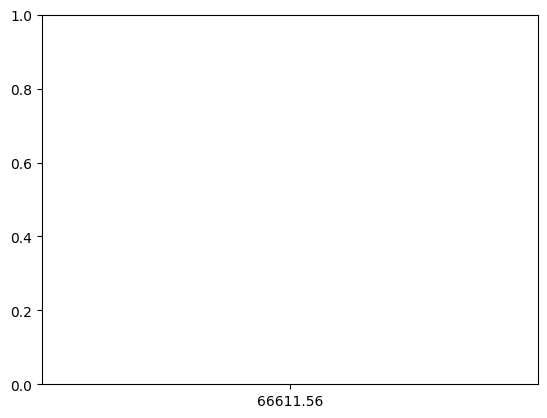

In [319]:
df.Percent_Change_2020.dropna()
df.Per_Capita_Exp_ESRD.dropna()
df.plot.scatter(x='Per_Capita_Exp_ESRD', y='Percent_Change_2020', alpha=0.6)
plt.xlabel('Per_Capita_Exp_ESRD')
plt.ylabel('Percent_Change_2020')